In [1]:
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.9/279.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=73f88a08705c17ba5b0fb764d205abadad16251c3b9bc5c74de319ce440f6b81
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=b35200462e41a6efd6a01cf4b71d68a8263ced8df814da9a230f434ce2db6406
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=9be7e0b03c172fd0c8f007c69be8c21cdf588ec02637fb353f0e2a5a338f186b
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully buil

In [3]:
import numpy as np
import pandas as pd
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt
import neural_lib as nl
from sklearn.model_selection import train_test_split
plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [87]:
df_1 = pd.read_csv('binarized_data_1.csv')
df_2 = pd.read_csv('binarized_data_2 (1).csv')
df_3 = pd.read_csv('binarized_data_3.csv')


# DataFrame 1

In [36]:
df_bin = df_1
df_bin = df_bin.reset_index(drop=True)
df_bin.set_index('sample_id', inplace=True)
df_bin

,"sepal_length(4.3, 4.8)","sepal_length(4.8, 5.3)","sepal_length(5.3, 5.8)","sepal_length(5.8, 6.3)","sepal_length(6.3, 6.8)","sepal_length(6.8, 7.3)","sepal_length(7.3, 7.8)","sepal_length(7.8, 8.3)","sepal_width(2.0, 2.5)","sepal_width(2.5, 3.0)",...,"petal_length(5.0, 5.5)","petal_length(5.5, 6.0)","petal_length(6.0, 6.5)","petal_length(6.5, 7.0)","petal_width(0.1, 0.6)","petal_width(0.6, 1.1)","petal_width(1.1, 1.6)","petal_width(1.6, 2.1)","petal_width(2.1, 2.6)",is_setosa
sample_id,,,,,,,,,,,,,,,,,,,,,
iris_0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
iris_1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
iris_2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
iris_3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
iris_4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iris_145,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
iris_146,False,False,False,False,True,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
iris_147,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [37]:
y_feat = 'is_setosa'
df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train

,"sepal_length(4.3, 4.8)","sepal_length(4.8, 5.3)","sepal_length(5.3, 5.8)","sepal_length(5.8, 6.3)","sepal_length(6.3, 6.8)","sepal_length(6.8, 7.3)","sepal_length(7.3, 7.8)","sepal_length(7.8, 8.3)","sepal_width(2.0, 2.5)","sepal_width(2.5, 3.0)",...,"petal_length(4.5, 5.0)","petal_length(5.0, 5.5)","petal_length(5.5, 6.0)","petal_length(6.0, 6.5)","petal_length(6.5, 7.0)","petal_width(0.1, 0.6)","petal_width(0.6, 1.1)","petal_width(1.1, 1.6)","petal_width(1.6, 2.1)","petal_width(2.1, 2.6)"
sample_id,,,,,,,,,,,,,,,,,,,,,
iris_60,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
iris_116,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
iris_144,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
iris_119,False,False,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
iris_108,False,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iris_9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
iris_103,False,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
iris_67,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [38]:
%%time
K_train = FormalContext.from_pandas(X_train)
K_train

CPU times: user 1.18 ms, sys: 0 ns, total: 1.18 ms
Wall time: 1.19 ms


FormalContext (105 objects, 30 attributes, 420 connections)
        |sepal_length(4.3, 4.8)|sepal_length(4.8, 5.3)|sepal_length(5.3, 5.8)|sepal_length(5.8, 6.3)|sepal_length(6.3, 6.8)|...|petal_width(0.1, 0.6)|petal_width(0.6, 1.1)|petal_width(1.1, 1.6)|petal_width(1.6, 2.1)|petal_width(2.1, 2.6)|
iris_60 |                      |                     X|                      |                      |                      |...|                     |                    X|                     |                     |                     |
iris_116|                      |                      |                      |                      |                     X|...|                     |                     |                     |                    X|                     |
iris_144|                      |                      |                      |                      |                     X|...|                     |                     |                     |                     |       

In [39]:
%%time

L = ConceptLattice.from_context(K_train,algo='Sofia', is_monotone=True)
len(L)

CPU times: user 144 ms, sys: 15 µs, total: 144 ms
Wall time: 144 ms


102

In [40]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)
    c.measures['recall_score'] = recall_score(y_train, y_preds)


concepts_count = 20
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train object"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )

set(X_train.columns)

{'petal_length(1.0, 1.5)',
 'petal_length(1.5, 2.0)',
 'petal_length(2.0, 2.5)',
 'petal_length(2.5, 3.0)',
 'petal_length(3.0, 3.5)',
 'petal_length(3.5, 4.0)',
 'petal_length(4.0, 4.5)',
 'petal_length(4.5, 5.0)',
 'petal_length(5.0, 5.5)',
 'petal_length(5.5, 6.0)',
 'petal_length(6.0, 6.5)',
 'petal_length(6.5, 7.0)',
 'petal_width(0.1, 0.6)',
 'petal_width(0.6, 1.1)',
 'petal_width(1.1, 1.6)',
 'petal_width(1.6, 2.1)',
 'petal_width(2.1, 2.6)',
 'sepal_length(4.3, 4.8)',
 'sepal_length(4.8, 5.3)',
 'sepal_length(5.3, 5.8)',
 'sepal_length(5.8, 6.3)',
 'sepal_length(6.3, 6.8)',
 'sepal_length(6.8, 7.3)',
 'sepal_length(7.3, 7.8)',
 'sepal_length(7.8, 8.3)',
 'sepal_width(2.0, 2.5)',
 'sepal_width(2.5, 3.0)',
 'sepal_width(3.0, 3.5)',
 'sepal_width(3.5, 4.0)',
 'sepal_width(4.0, 4.5)'}

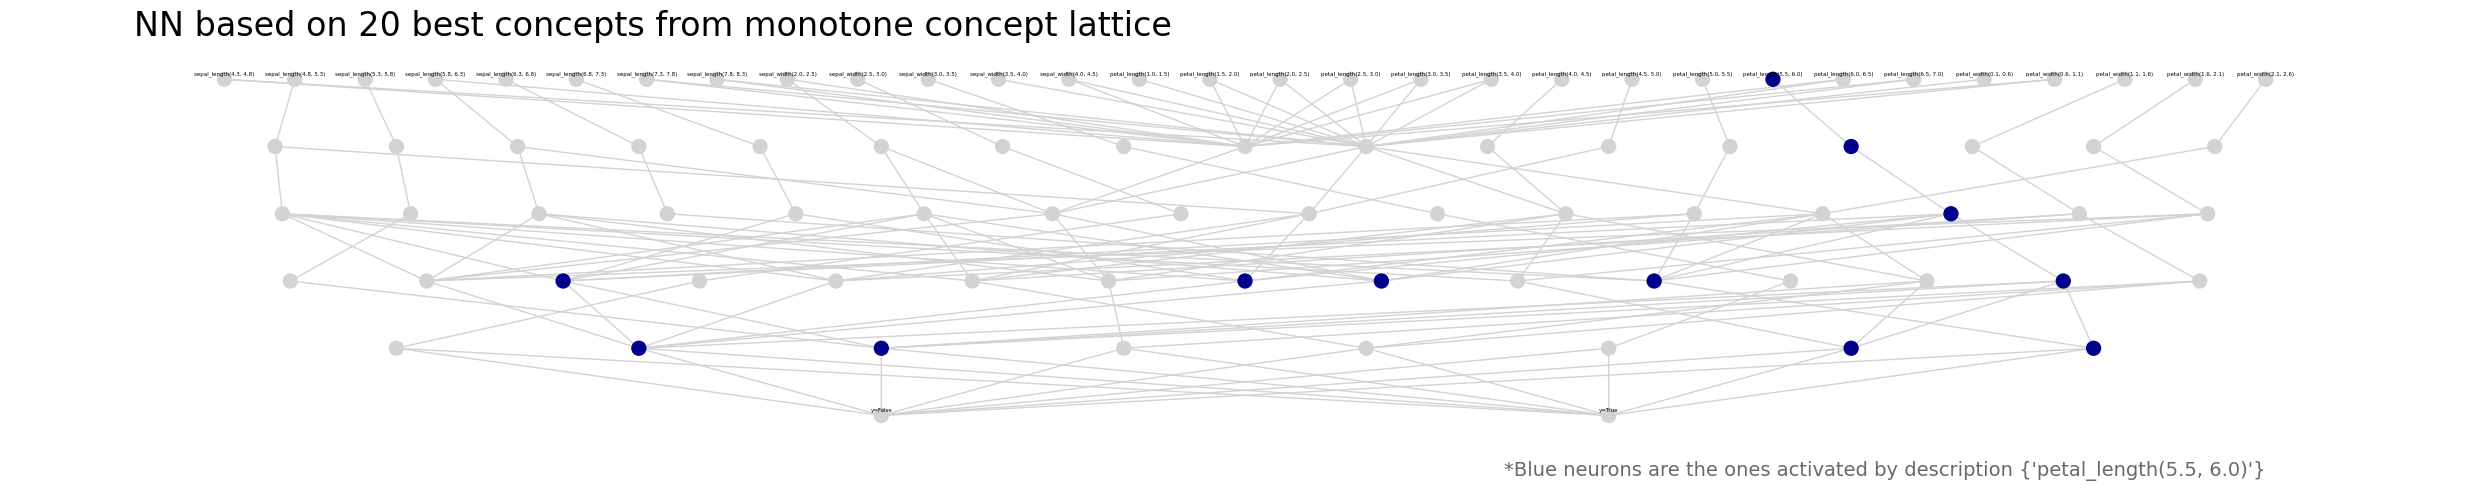

In [41]:
descr = {'petal_length(5.5, 6.0)'}

traced = cn.trace_description(descr, include_targets=False)
fig, ax = plt.subplots(figsize=(25,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))
                ],
               node_size=100,
               node_label_font_size=4.5
)
plt.title(f'NN based on '+str(concepts_count)+' best concepts from monotone concept lattice', loc='left', x=0.05, size=24)

plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3, f'*Blue neurons are the ones activated by description {descr}', fontsize=14, ha='right', color='dimgray')

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('nn_big.png')
plt.show()

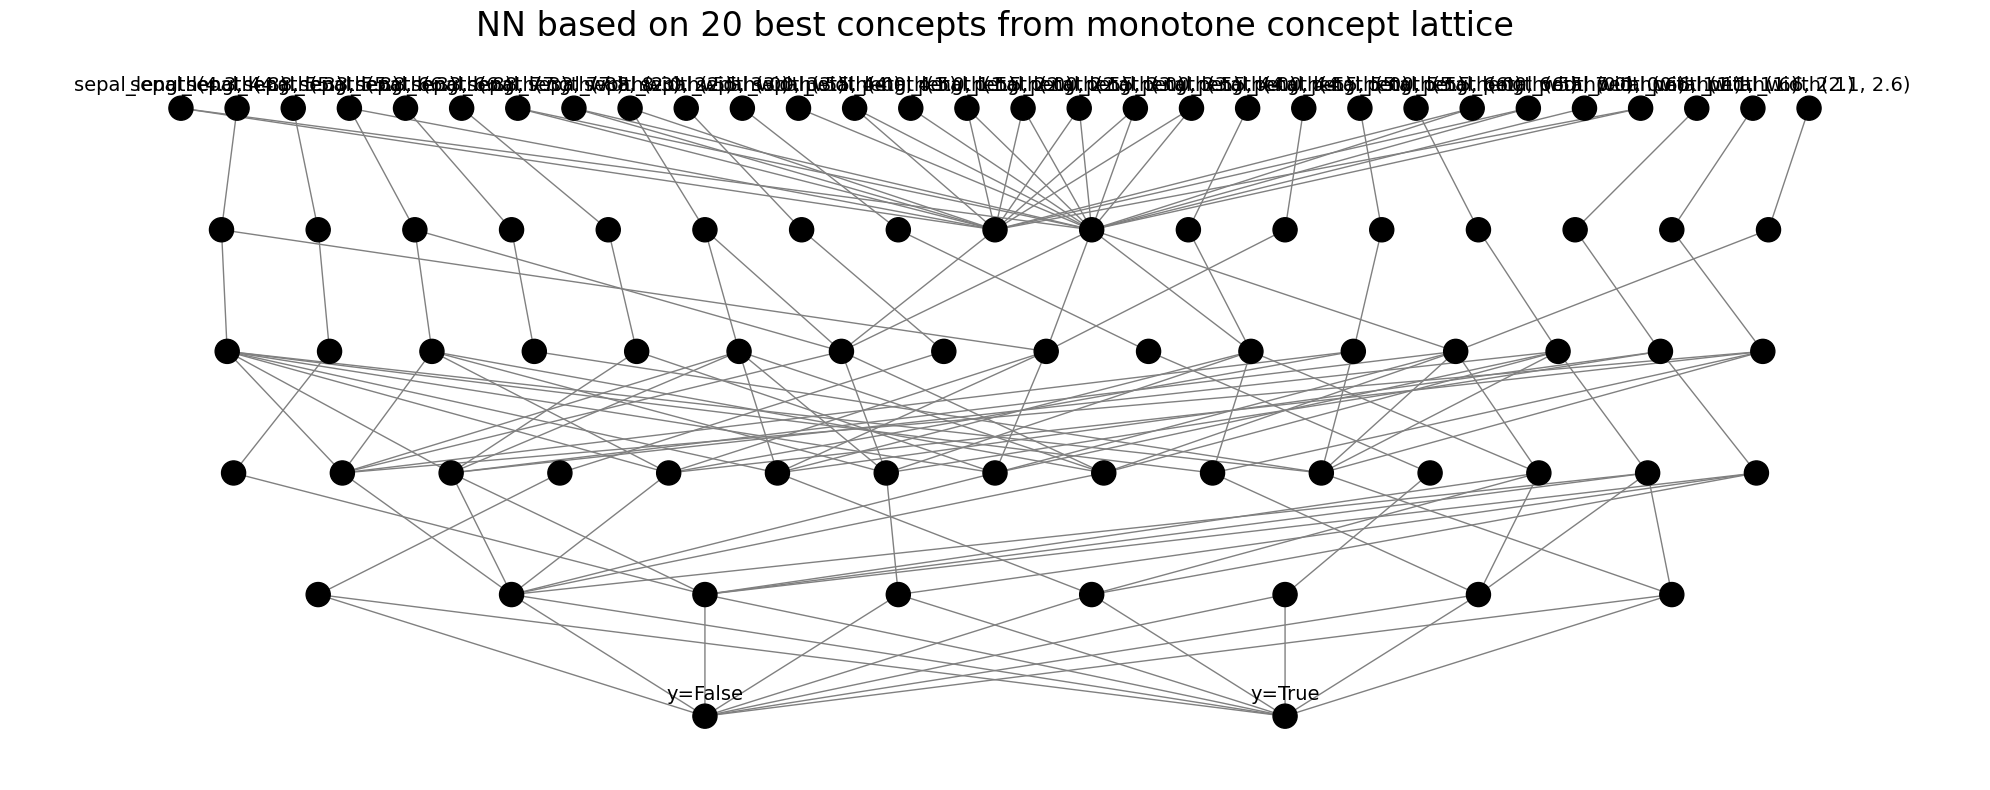

In [42]:

fig, ax = plt.subplots(figsize=(20,8))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {concepts_count} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.show()


In [43]:
import torch

In [44]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 2000, nonlinearity=torch.nn.GELU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [0 0 1 0 1 0 1 0 0 0]
Class prediction with probabilities [[9.9995959e-01 4.0368199e-05]
 [9.9999738e-01 2.5749532e-06]
 [2.5166789e-04 9.9974829e-01]
 [9.9999988e-01 8.9946340e-08]
 [8.8923862e-06 9.9999106e-01]
 [9.9999893e-01 1.1168321e-06]
 [3.5949706e-05 9.9996400e-01]
 [9.9990892e-01 9.1056449e-05]
 [9.9990153e-01 9.8485943e-05]
 [9.9995148e-01 4.8493537e-05]]
True class [False False  True False  True False  True False False False]
Recall score: 1.0
F1 score: 1.0
Accuracy score: 1.0


In [ ]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 5000, nonlinearity=torch.nn.GELU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [0 0 1 0 1 0 1 0 0 0]
Class prediction with probabilities [[9.9999547e-01 4.4857256e-06]
 [9.9999893e-01 1.0410417e-06]
 [2.6723465e-06 9.9999738e-01]
 [9.9999952e-01 5.2897116e-07]
 [1.6082948e-05 9.9998391e-01]
 [9.9999928e-01 6.7753530e-07]
 [1.6829800e-06 9.9999833e-01]
 [9.9999678e-01 3.1641471e-06]
 [9.9999678e-01 3.1630668e-06]
 [9.9999130e-01 8.7219078e-06]]
True class [False False  True False  True False  True False False False]
Recall score: 1.0
F1 score: 1.0
Accuracy score: 1.0


In [ ]:
edge_weights = cn.edge_weights_from_network()

/usr/local/lib/python3.10/dist-packages/sparselinear/sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:605.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


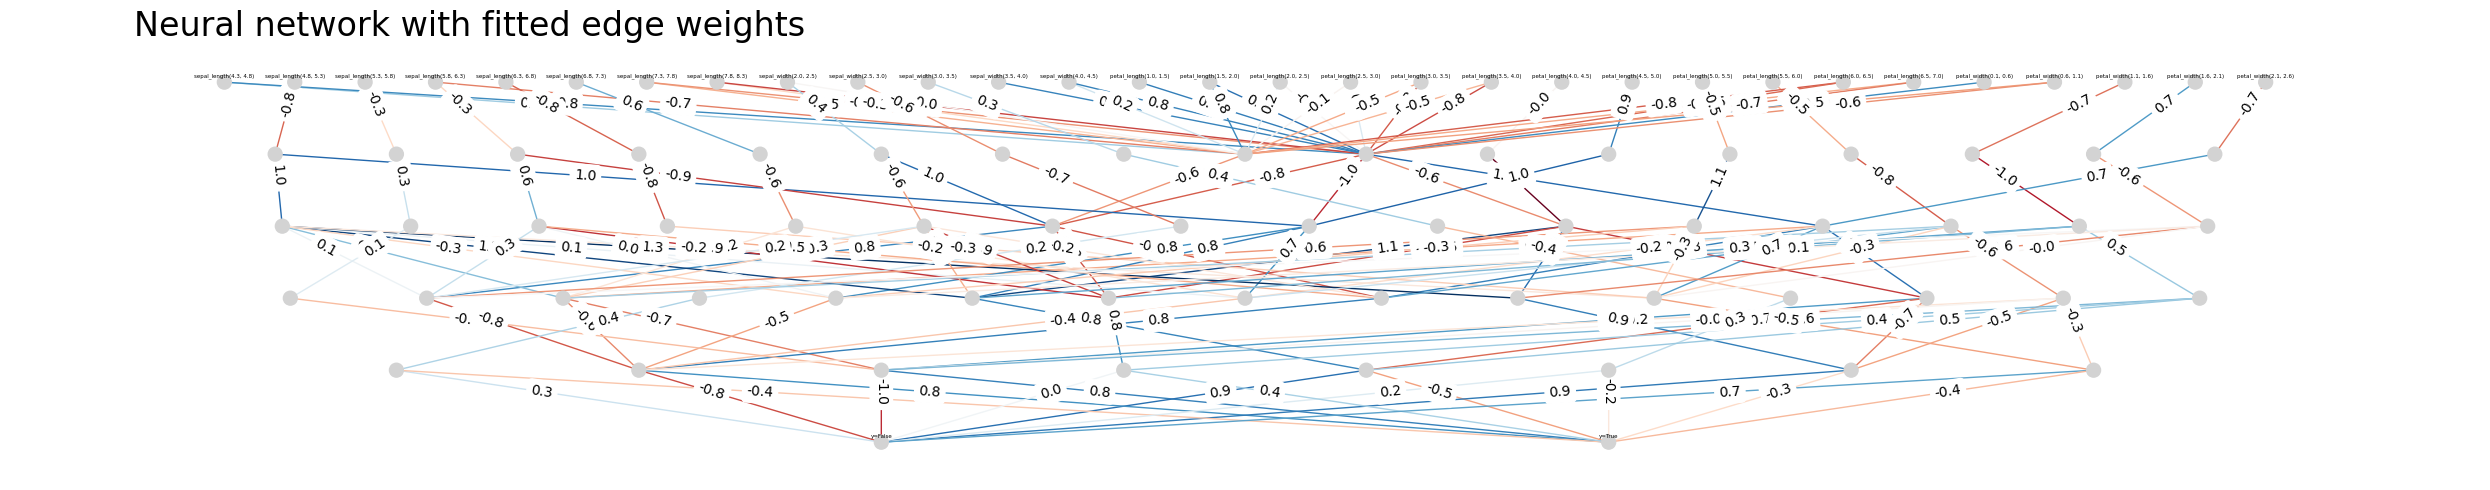

In [ ]:
import networkx as nx

fig, ax = plt.subplots(figsize=(25,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,

               node_size=100,
               node_label_font_size=4.5
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_big.png')
plt.show()

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 1.9 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Инициализация моделей
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

# Обучение моделей и расчет метрик
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    results[name] = (accuracy, f1)

# Вывод результатов
for name, (accuracy, f1) in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}, F1-Score = {f1:.4f}")

Decision Tree: Accuracy = 0.9778, F1-Score = 0.9677
Random Forest: Accuracy = 0.9778, F1-Score = 0.9677
XGBoost: Accuracy = 0.9778, F1-Score = 0.9677
K-Nearest Neighbors: Accuracy = 1.0000, F1-Score = 1.0000
Naive Bayes: Accuracy = 0.9778, F1-Score = 0.9677
Logistic Regression: Accuracy = 1.0000, F1-Score = 1.0000


Датасет 2


# DataFrame 2


In [106]:
df_bin = df_2
df_bin = df_bin.reset_index(drop=True)
df_bin.set_index('sample_id', inplace=True)
df_bin

,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,smoking_status_smokes,age(0-30),age(30-60),age(60-90),avg_glucose_level(55-155),avg_glucose_level(155-255),avg_glucose_level(255-355),bmi(10-50),bmi(50-90),bmi(90-130)
sample_id,,,,,,,,,,,,,,,,,,,,,
person_0,False,True,True,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
person_1,False,False,True,True,False,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
person_2,False,True,True,False,True,False,False,True,False,False,...,False,False,False,True,True,False,False,True,False,False
person_3,False,False,True,True,False,False,False,True,False,False,...,True,False,True,False,False,True,False,True,False,False
person_4,True,False,True,True,False,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_5105,True,False,False,True,False,False,False,True,False,False,...,False,False,False,True,True,False,False,True,False,False
person_5106,False,False,False,True,False,False,False,True,False,False,...,False,False,False,True,True,False,False,True,False,False
person_5107,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False


In [107]:
y_feat = 'stroke'
df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train

,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,smoking_status_smokes,age(0-30),age(30-60),age(60-90),avg_glucose_level(55-155),avg_glucose_level(155-255),avg_glucose_level(255-355),bmi(10-50),bmi(50-90),bmi(90-130)
sample_id,,,,,,,,,,,,,,,,,,,,,
person_1921,False,False,False,True,False,False,True,False,False,True,...,True,False,True,False,True,False,False,True,False,False
person_4074,False,False,True,False,False,False,True,True,False,False,...,False,False,False,True,False,True,False,True,False,False
person_2311,False,False,True,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
person_3080,False,False,True,False,False,False,True,False,False,True,...,False,False,False,True,True,False,False,True,False,False
person_1620,False,False,True,False,False,False,True,True,False,False,...,False,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_4931,True,False,True,False,False,False,True,True,False,False,...,True,False,True,False,True,False,False,True,False,False
person_3264,False,False,True,False,False,False,True,False,False,True,...,False,False,False,True,True,False,False,True,False,False
person_1653,False,False,False,True,False,False,True,False,False,True,...,True,False,True,False,True,False,False,True,False,False


In [108]:
%%time
K_train = FormalContext.from_pandas(X_train)
K_train

CPU times: user 17.2 ms, sys: 0 ns, total: 17.2 ms
Wall time: 18.1 ms


FormalContext (3577 objects, 27 attributes, 29158 connections)
           |hypertension|heart_disease|gender_Female|gender_Male|gender_Other|...|avg_glucose_level(155-255)|avg_glucose_level(255-355)|bmi(10-50)|bmi(50-90)|bmi(90-130)|
person_1921|            |             |             |          X|            |...|                          |                          |         X|          |           |
person_4074|            |             |            X|           |            |...|                         X|                          |         X|          |           |
person_2311|            |             |            X|           |            |...|                          |                          |         X|          |           |
person_3080|            |             |            X|           |            |...|                          |                          |         X|          |           |
person_1620|            |             |            X|           |            |...|

In [109]:
%%time

L = ConceptLattice.from_context(K_train,algo='Sofia', is_monotone=True)
len(L)

CPU times: user 1.84 s, sys: 5.66 ms, total: 1.84 s
Wall time: 1.86 s


102

In [110]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)
    c.measures['recall_score'] = recall_score(y_train, y_preds)


concepts_count = 32
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train object"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )

set(X_train.columns)

{'Residence_type_Rural',
 'Residence_type_Urban',
 'age(0-30)',
 'age(30-60)',
 'age(60-90)',
 'avg_glucose_level(155-255)',
 'avg_glucose_level(255-355)',
 'avg_glucose_level(55-155)',
 'bmi(10-50)',
 'bmi(50-90)',
 'bmi(90-130)',
 'ever_married_No',
 'ever_married_Yes',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'heart_disease',
 'hypertension',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children'}

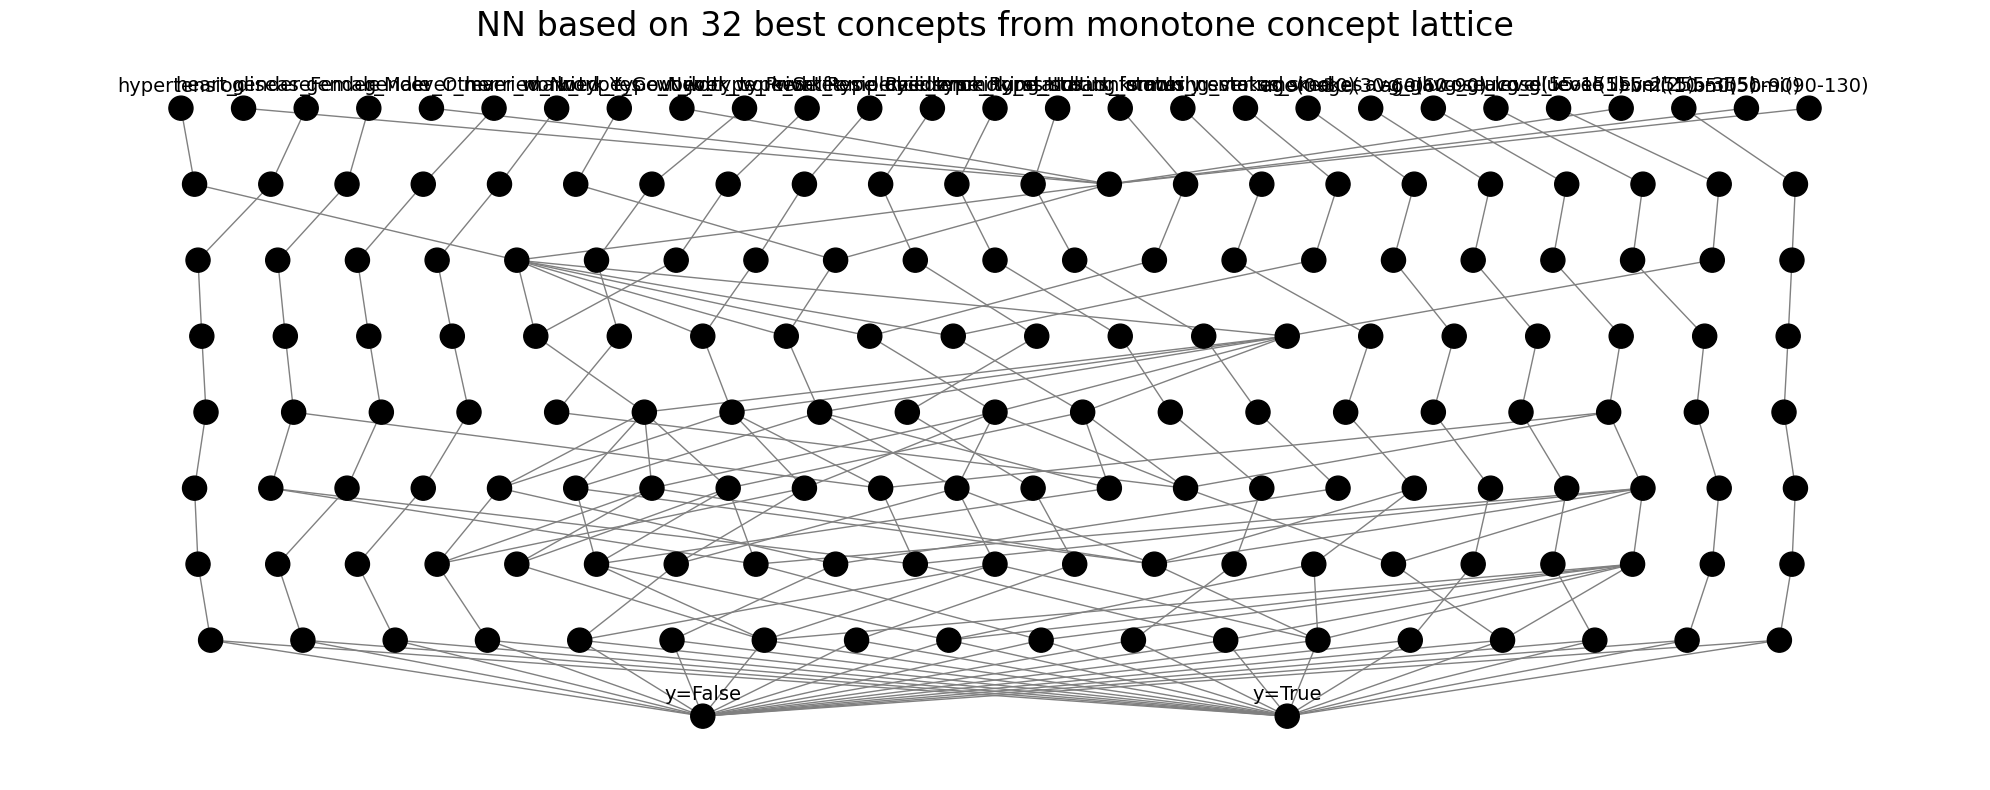

In [111]:
fig, ax = plt.subplots(figsize=(20,8))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {concepts_count} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [112]:
from sklearn.utils.class_weight import compute_class_weight

# Вычисление весов классов
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class weights:", class_weights_dict)

Class weights: {0: 0.5254112808460635, 1: 10.33815028901734}


У нас классы не сбалансированные, поэтому добим веса к классам

In [114]:
from sklearn.metrics import precision_score, roc_auc_score, confusion_matrix
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)


cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, loss_fn=loss_fn, n_epochs=5000, nonlinearity=torch.nn.GELU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))
precision = precision_score(y_test.values.astype('int'), y_pred)
print('Precision score:', precision)

# AUC-ROC
auc_roc = roc_auc_score(y_test.values.astype('int'), y_pred)
print('AUC-ROC score:', auc_roc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test.values.astype('int'), y_pred)
print('Confusion Matrix:\n', conf_matrix)

Class prediction [1 0 0 0 0 0 0 0 1 0]
Class prediction with probabilities [[2.4160037e-03 9.9758399e-01]
 [1.0000000e+00 5.5201671e-08]
 [1.0000000e+00 4.8022827e-12]
 [1.0000000e+00 1.1488782e-08]
 [9.9989688e-01 1.0311490e-04]
 [9.9999988e-01 1.0943666e-07]
 [9.9798429e-01 2.0156642e-03]
 [9.9995744e-01 4.2563526e-05]
 [4.1481629e-01 5.8518374e-01]
 [1.0000000e+00 6.1368682e-10]]
True class [ True False False False False False False False False False]
Recall score: 0.6052631578947368
F1 score: 0.19827586206896552
Accuracy score: 0.7573385518590998
Precision score: 0.11855670103092783
AUC-ROC score: 0.6852671314525159
Confusion Matrix:
 [[1115  342]
 [  30   46]]


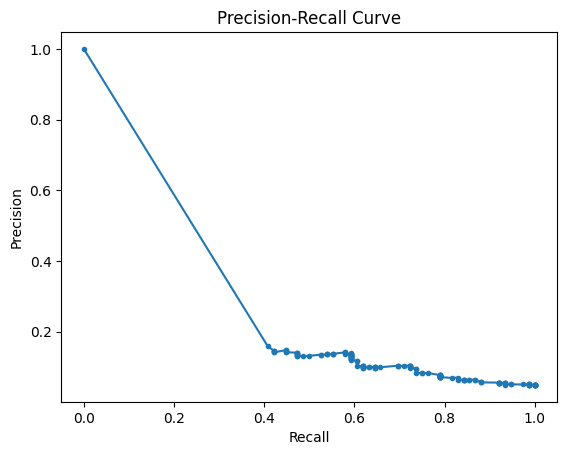

Optimal threshold: 1.0


In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Получаем предсказанные вероятности для класса 1
y_proba = cn.predict_proba(X_test).detach().numpy()[:, 1]

# Вычисляем точность и полноту для различных порогов
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Построение кривой Precision-Recall
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
f1_scores = 2 * recall * precision / (recall + precision)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print('Optimal threshold:', optimal_threshold)

It seems that this model is not suitable for imbalanced classes. We could manually adjust the decision threshold, but then the accuracy for class 0 would decrease, while the accuracy for class 1 would increase. Let's leave it as it is for now.

In [97]:
edge_weights = cn.edge_weights_from_network()

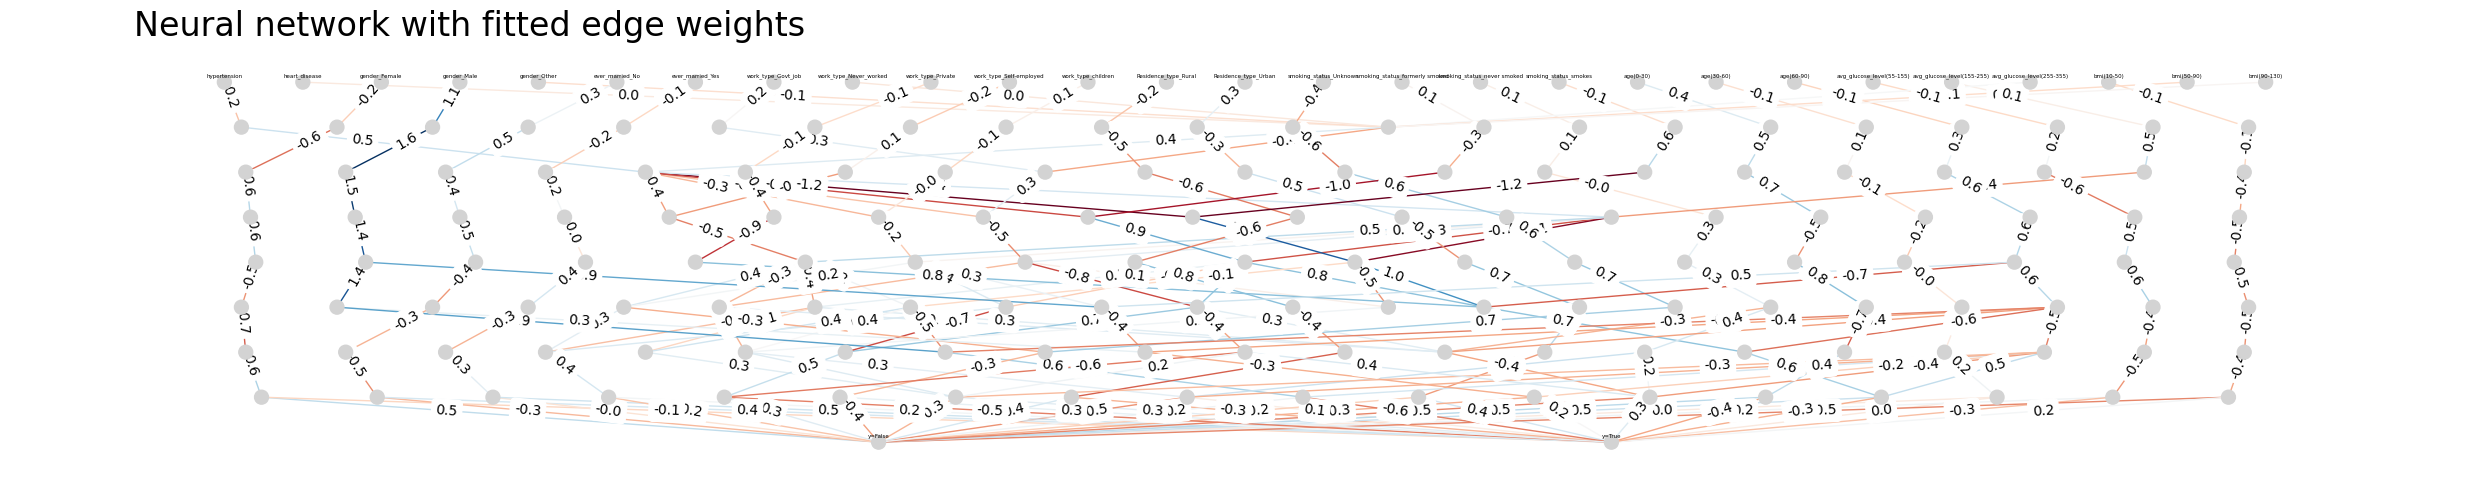

In [98]:
import networkx as nx

fig, ax = plt.subplots(figsize=(25,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,

               node_size=100,
               node_label_font_size=4.5
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_big.png')
plt.show()

# DataFrame 3

In [72]:
df_bin = df_3
df_bin = df_bin.reset_index(drop=True)
df_bin.set_index('sample_id', inplace=True)
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88904 entries, Person_0 to Person_88903
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Inflight wifi service_high              88904 non-null  bool 
 1   Departure/Arrival time convenient_high  88904 non-null  bool 
 2   Ease of Online booking_high             88904 non-null  bool 
 3   Gate location_high                      88904 non-null  bool 
 4   Food and drink_high                     88904 non-null  bool 
 5   Online boarding_high                    88904 non-null  bool 
 6   Seat comfort_high                       88904 non-null  bool 
 7   Inflight entertainment_high             88904 non-null  bool 
 8   On-board service_high                   88904 non-null  bool 
 9   Leg room service_high                   88904 non-null  bool 
 10  Baggage handling_high                   88904 non-null  bool 
 11  Checki

In [73]:
y_feat = 'satisfaction'
df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train

,Inflight wifi service_high,Departure/Arrival time convenient_high,Ease of Online booking_high,Gate location_high,Food and drink_high,Online boarding_high,Seat comfort_high,Inflight entertainment_high,On-board service_high,Leg room service_high,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Departure_Delay_30min,Arrival_Delay_30min
sample_id,,,,,,,,,,,,,,,,,,,,,
Person_87027,False,True,False,False,True,False,True,True,False,True,...,True,True,False,False,True,False,True,False,False,False
Person_60325,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
Person_58715,False,True,False,False,False,True,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
Person_64095,False,True,False,True,False,False,True,False,True,False,...,True,True,False,False,True,False,True,False,False,False
Person_3663,True,True,True,True,False,True,False,False,False,True,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Person_21243,True,False,False,False,False,False,False,True,True,True,...,False,True,False,True,False,False,True,False,False,False
Person_45891,False,True,False,False,False,True,True,True,True,True,...,True,True,False,True,False,True,False,False,False,False
Person_42613,True,True,True,False,False,True,False,False,True,True,...,True,True,False,False,True,False,True,False,False,False


In [74]:
%%time
K_train = FormalContext.from_pandas(X_train)
K_train

CPU times: user 872 ms, sys: 13.9 ms, total: 886 ms
Wall time: 886 ms


FormalContext (62232 objects, 43 attributes, 809451 connections)
            |Inflight wifi service_high|Departure/Arrival time convenient_high|Ease of Online booking_high|Gate location_high|Food and drink_high|...|Class_Business|Class_Eco|Class_Eco Plus|Departure_Delay_30min|Arrival_Delay_30min|
Person_87027|                          |                                     X|                           |                  |                  X|...|              |        X|              |                     |                   |
Person_60325|                          |                                      |                           |                  |                   |...|              |        X|              |                     |                   |
Person_58715|                          |                                     X|                           |                  |                   |...|              |        X|              |                     |                   |
Per

In [75]:
%%time

L = ConceptLattice.from_context(K_train,algo='Sofia', is_monotone=True)
len(L)

CPU times: user 38.2 s, sys: 152 ms, total: 38.4 s
Wall time: 39 s


102

In [76]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)
    c.measures['recall_score'] = recall_score(y_train, y_preds)


concepts_count = 15
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:concepts_count])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train object"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
    edge_cmap="hsv"
    )

set(X_train.columns)

{'Age_17_27',
 'Age_27_37',
 'Age_37_47',
 'Age_47_57',
 'Age_57_67',
 'Age_67_77',
 'Age_77_87',
 'Age_7_17',
 'Arrival_Delay_30min',
 'Baggage handling_high',
 'Checkin service_high',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'Cleanliness_high',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Departure/Arrival time convenient_high',
 'Departure_Delay_30min',
 'Ease of Online booking_high',
 'Flight Distance_1031_1531',
 'Flight Distance_1531_2031',
 'Flight Distance_2031_2531',
 'Flight Distance_2531_3031',
 'Flight Distance_3031_3531',
 'Flight Distance_31_531',
 'Flight Distance_3531_4031',
 'Flight Distance_4031_4531',
 'Flight Distance_4531_5031',
 'Flight Distance_531_1031',
 'Food and drink_high',
 'Gate location_high',
 'Gender_Female',
 'Gender_Male',
 'Inflight entertainment_high',
 'Inflight service_high',
 'Inflight wifi service_high',
 'Leg room service_high',
 'On-board service_high',
 'Online boarding_high',
 'Seat comfort_high',
 'Type

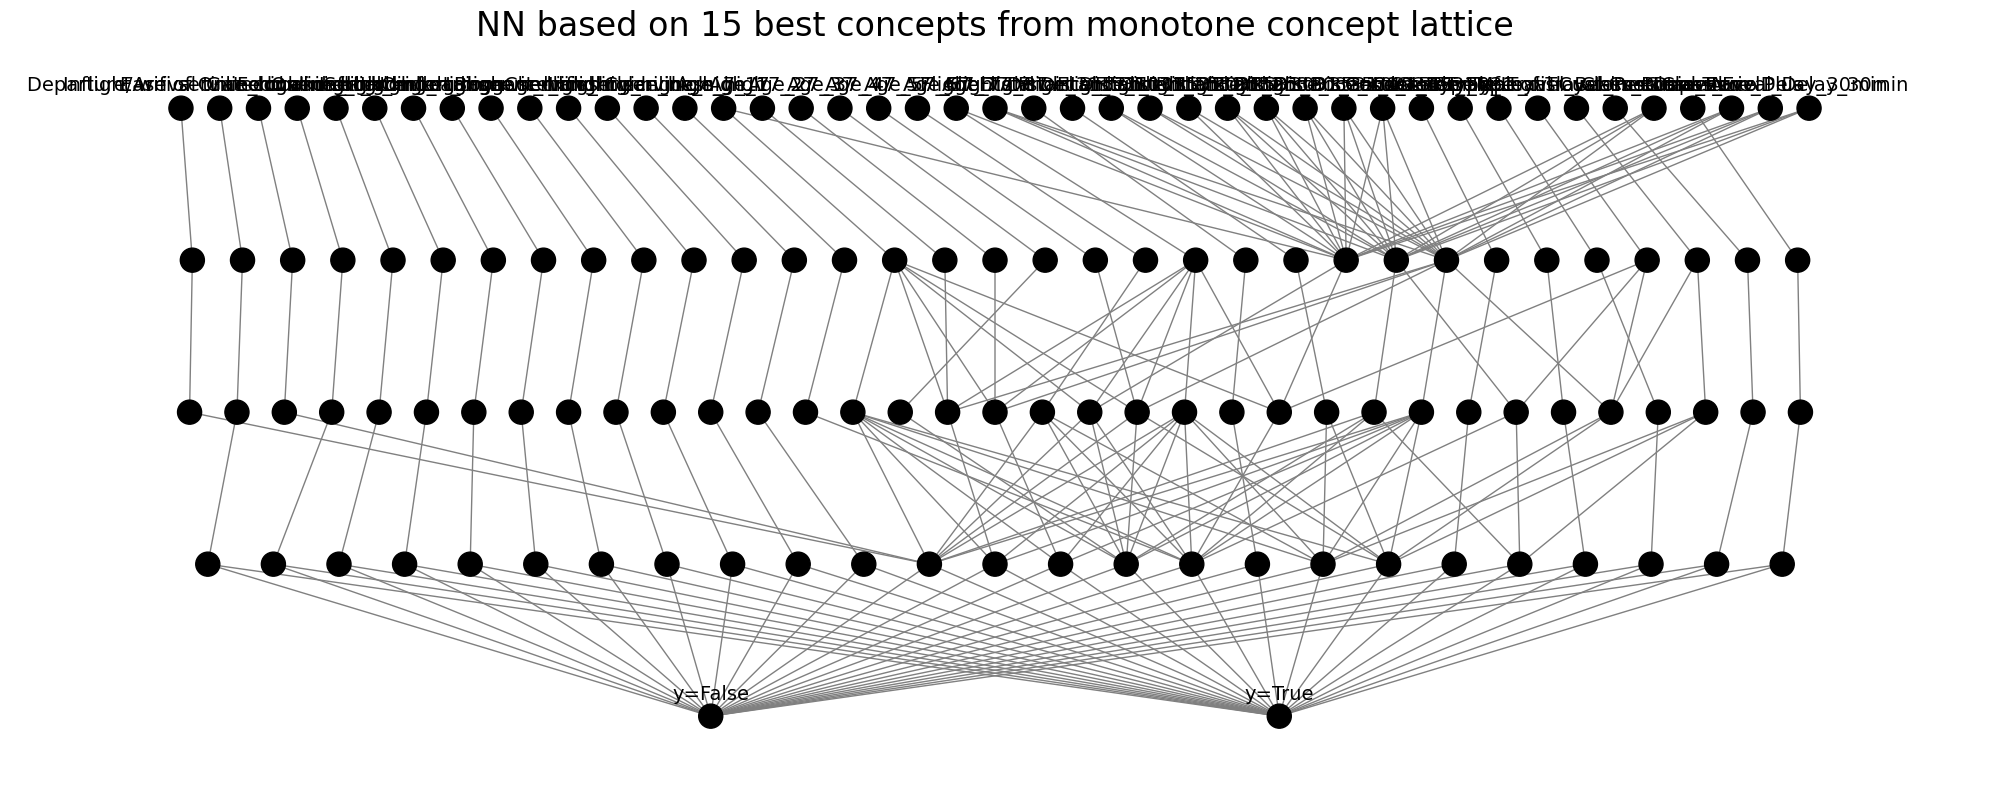

In [77]:
fig, ax = plt.subplots(figsize=(20,8))

vis.draw_poset(
    cn.poset, ax=ax, edge_color='grey',
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color='black',
)

plt.title(f'NN based on {concepts_count} best concepts from monotone concept lattice', loc='center', size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.show()

It would probably have been a good idea to remove some attributes on the left, but for the sake of the experiment, I think we should leave them.

In [68]:
import torch

In [69]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 2000, nonlinearity=torch.nn.GELU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 1 0 1 0 1 1 0]
Class prediction with probabilities [[3.9997330e-01 6.0002673e-01]
 [1.0000000e+00 3.1247787e-09]
 [3.7795066e-06 9.9999619e-01]
 [6.3835696e-06 9.9999356e-01]
 [1.0000000e+00 5.2425375e-10]
 [6.6705416e-06 9.9999332e-01]
 [9.9999988e-01 1.5675720e-07]
 [9.2143424e-02 9.0785664e-01]
 [1.5964009e-06 9.9999845e-01]
 [9.9990797e-01 9.2051720e-05]]
True class [ True False  True  True False  True  True  True  True False]
Recall score: 0.8643103448275862
F1 score: 0.8827646929341845
Accuracy score: 0.9001574685062987


In [78]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 4000, nonlinearity=torch.nn.GELU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 1 0 1 0 1 1 0]
Class prediction with probabilities [[4.6238637e-01 5.3761369e-01]
 [1.0000000e+00 9.4122778e-13]
 [4.3338783e-08 1.0000000e+00]
 [3.1849225e-08 1.0000000e+00]
 [1.0000000e+00 7.8212635e-16]
 [3.2397892e-08 1.0000000e+00]
 [1.0000000e+00 1.4318748e-10]
 [4.8562404e-02 9.5143753e-01]
 [9.4353583e-09 1.0000000e+00]
 [9.9999988e-01 7.7625899e-08]]
True class [ True False  True  True False  True  True  True  True False]
Recall score: 0.8647413793103448
F1 score: 0.8827385928631144
Accuracy score: 0.9000824835032993


In [79]:
edge_weights = cn.edge_weights_from_network()

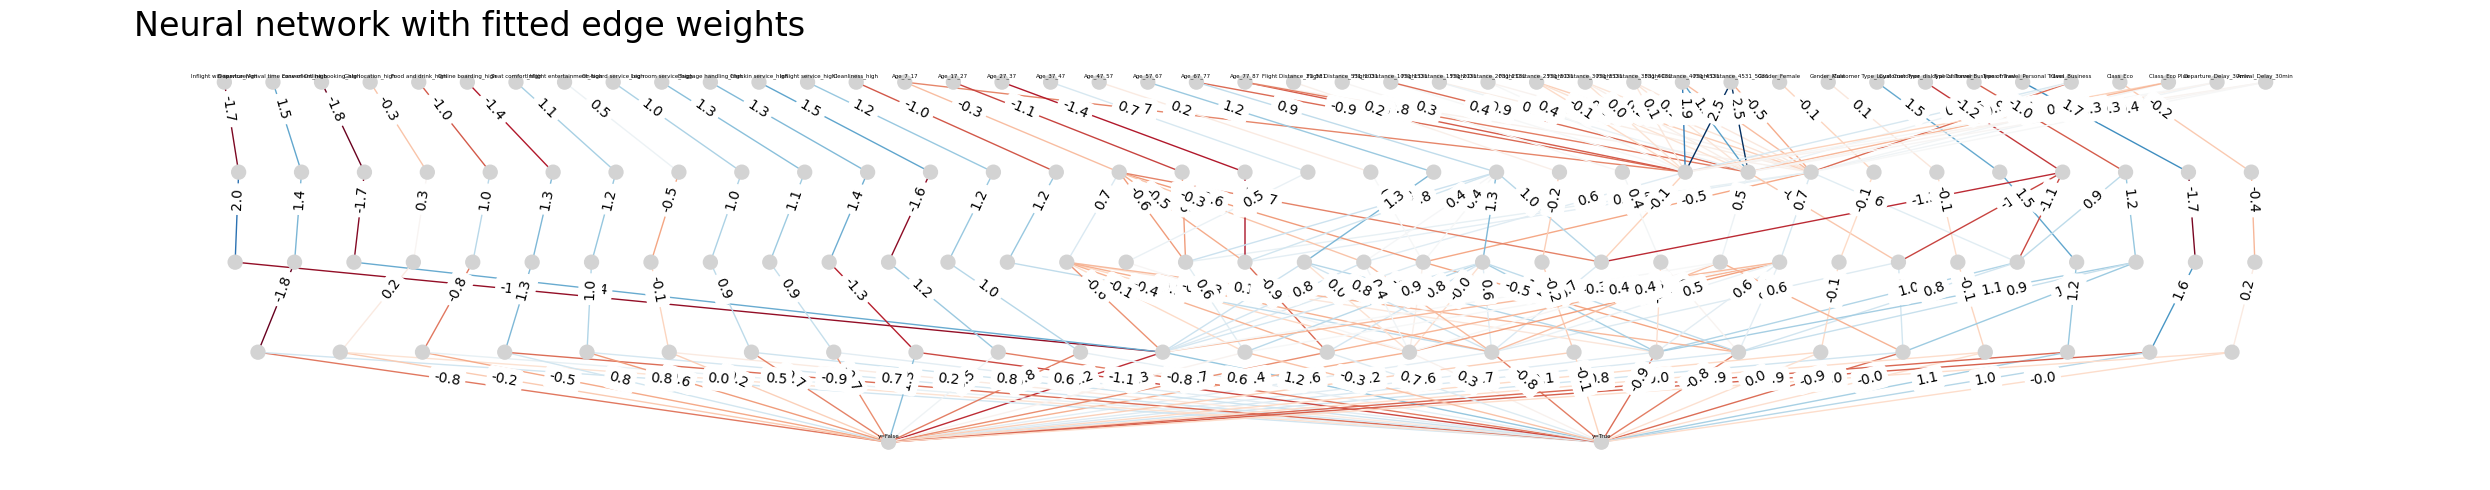

In [71]:
import networkx as nx

fig, ax = plt.subplots(figsize=(25,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,

               node_size=100,
               node_label_font_size=4.5
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_big.png')
plt.show()